In [31]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pingouin as pg

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

## Explore target variable:

In [20]:
target = pd.read_csv('data/Germany/heads.csv')
target.head()

Date    head
0  2002-05-01  374.76
1  2002-05-02  374.75
2  2002-05-03  374.74
3  2002-05-04  374.72
4  2002-05-05  374.71

In [11]:
target['Date'].describe()

count                   5359
mean     2009-08-31 00:00:00
min      2002-05-01 00:00:00
25%      2005-12-30 12:00:00
50%      2009-08-31 00:00:00
75%      2013-05-01 12:00:00
max      2016-12-31 00:00:00
Name: Date, dtype: object

In [12]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5359 non-null   datetime64[ns]
 1   head    5359 non-null   float64       
 2   year    5359 non-null   int32         
 3   month   5359 non-null   int32         
 4   day     5359 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3)
memory usage: 146.7 KB


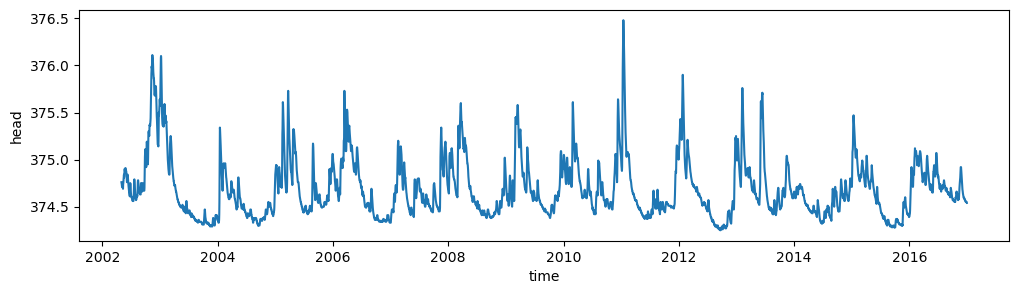

In [14]:
plt.figure(figsize=(12,3))
plt.plot(target['Date'],target['head'])
plt.xlabel('time')
plt.ylabel('head')
plt.show()

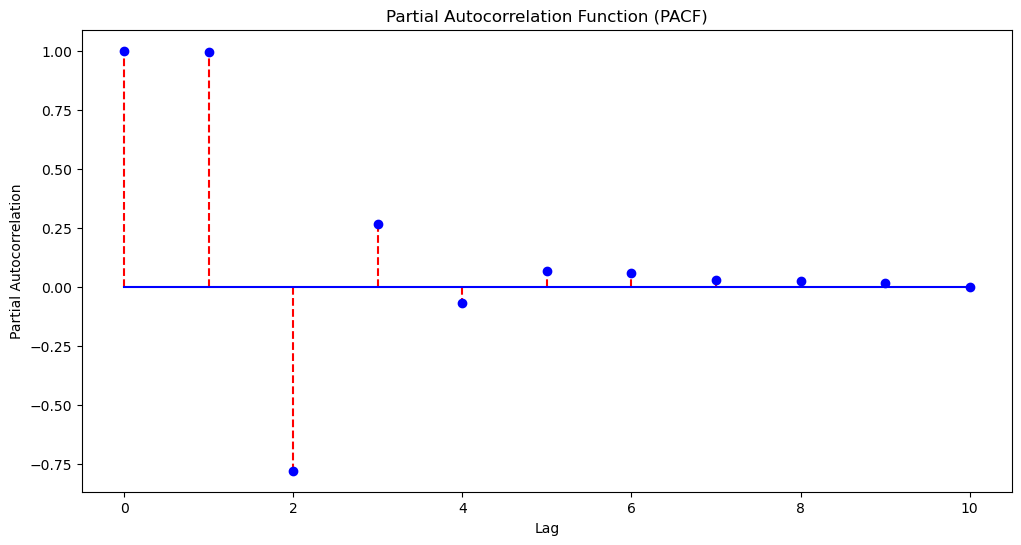

In [27]:
# Partial Autocorrelation Plot of target variable to determine number of lags

ts = target.set_index('Date')

# Calculate Partial Autocorrelation Function
pacf_result = sm.tsa.pacf(ts, nlags=10, method='ols')

# Plot PACF
plt.figure(figsize=(12, 6))
plt.stem(range(len(pacf_result)), pacf_result, markerfmt='bo', basefmt='b-', linefmt='r--')
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

## Explore feature variables:

In [8]:
df = pd.read_csv('data/Germany/input_data.csv')
df['time'] = df['time'].astype('datetime64[ns]')
df['year'] = pd.DatetimeIndex(df['time']).year
df['month'] = pd.DatetimeIndex(df['time']).month
df['day'] = pd.DatetimeIndex(df['time']).day
df.head()

time   rr    tg    tn    tx      pp        hu    fg    qq        et  \
0 1990-01-01  0.0 -4.47 -5.31 -3.86  1022.4  92.15000  1.03  30.0  0.219842   
1 1990-01-02  0.0 -2.74 -5.45 -0.43  1023.5  91.37500  0.99  33.0  0.261125   
2 1990-01-03  0.0 -1.05 -3.52 -0.29  1024.4  86.18000  2.09  15.0  0.127449   
3 1990-01-04  0.0 -3.00 -4.11 -0.79  1027.9  88.58500  2.22  30.0  0.234045   
4 1990-01-05  1.4 -1.46 -3.50 -0.87  1027.8  92.46001  1.56  14.0  0.116699   

   year  month  day  
0  1990      1    1  
1  1990      1    2  
2  1990      1    3  
3  1990      1    4  
4  1990      1    5

In [9]:
df.describe()

time            rr            tg  \
count                          11688  11688.000000  11688.000000   
mean   2005-12-31 11:59:59.999999872      1.894918      8.710076   
min              1990-01-01 00:00:00      0.000000    -16.449999   
25%              1997-12-31 18:00:00      0.000000      2.620000   
50%              2005-12-31 12:00:00      0.000000      8.780000   
75%              2013-12-31 06:00:00      2.000000     14.900000   
max              2021-12-31 00:00:00     50.800000     27.960000   
std                              NaN      4.173772      7.675261   

                 tn            tx            pp            hu            fg  \
count  11688.000000  11688.000000  11688.000000  11688.000000  11688.000000   
mean       4.063214     13.532966   1017.359756     79.907466      2.522858   
min      -22.310000    -10.110000    979.300000     29.290000      0.480000   
25%       -0.730000      5.980000   1012.300000     72.172500      1.760000   
50%        4.085000     13.665000   1017.100040     81.810002      2.300000   
75%        9.450000     20.850000   1022.600040     89.520004      3.050000   
max       21.449999     36.590000   1045.800000     95.200005      9.360000   
std        6.741084      9.209754      8.298258     11.301445      1.098692   

                 qq            et          year         month           day  
count  11688.000000  11688.000000  11688.000000  11688.000000  11688.000000  
mean     132.551335      1.755455   2005.500342      6.522930     15.729637  
min       12.000000      0.092640   1990.000000      1.000000      1.000000  
25%       48.000000      0.460604   1997.750000      4.000000      8.000000  
50%      113.000000      1.314659   2005.500000      7.000000     16.000000  
75%      208.000000      2.846947   2013.250000     10.000000     23.000000  
max      353.000000      5.733707   2021.000000     12.000000     31.000000  
std       92.311618      1.445730      9.233451      3.448851      8.800469

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    11688 non-null  datetime64[ns]
 1   rr      11688 non-null  float64       
 2   tg      11688 non-null  float64       
 3   tn      11688 non-null  float64       
 4   tx      11688 non-null  float64       
 5   pp      11688 non-null  float64       
 6   hu      11688 non-null  float64       
 7   fg      11688 non-null  float64       
 8   qq      11688 non-null  float64       
 9   et      11688 non-null  float64       
 10  year    11688 non-null  int32         
 11  month   11688 non-null  int32         
 12  day     11688 non-null  int32         
dtypes: datetime64[ns](1), float64(9), int32(3)
memory usage: 1.0 MB


In [15]:
# extract dataset for the time span available in target variable
df = df[(df['time'] >= '2002-05-01') & (df['time'] <= '2016-12-31')]


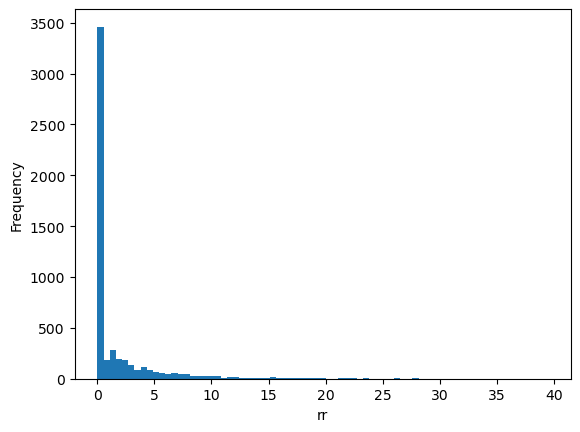

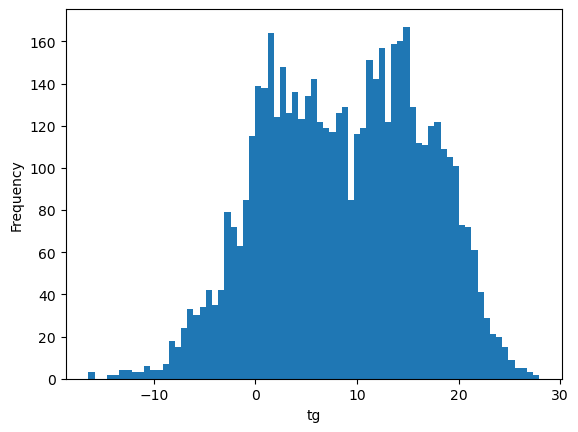

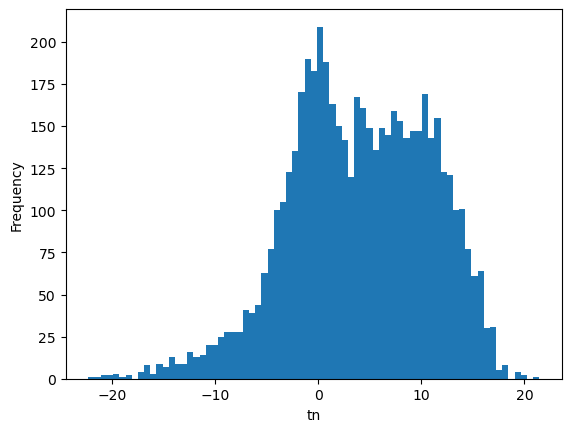

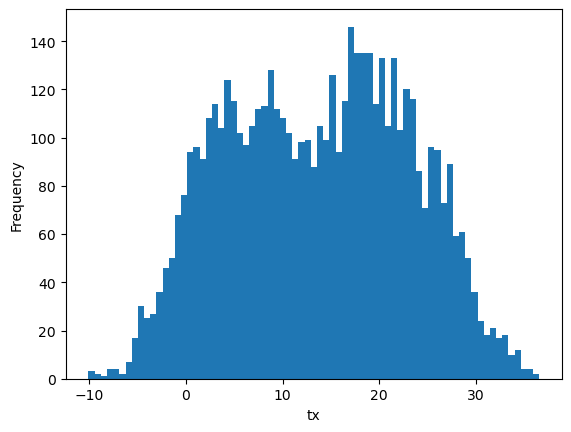

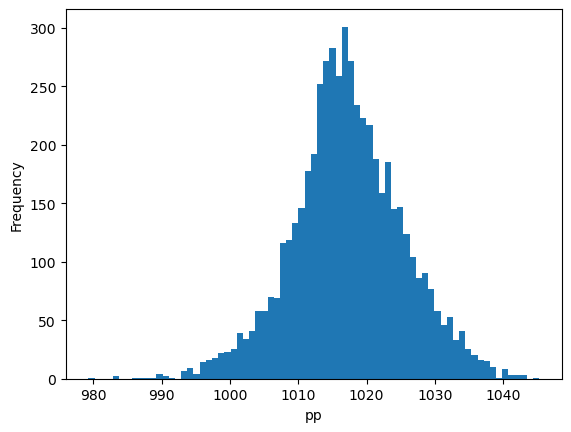

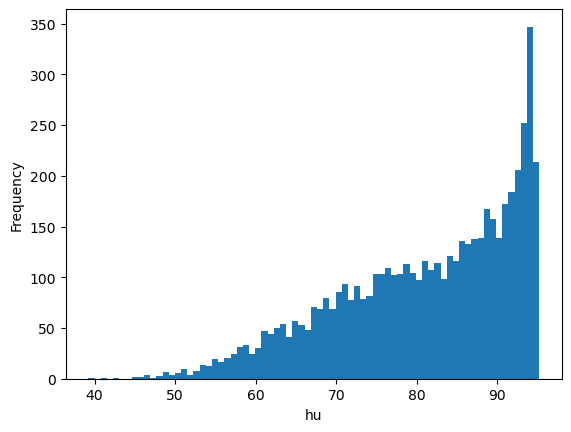

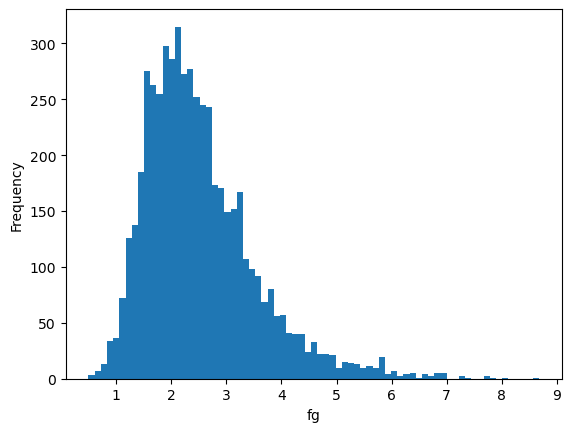

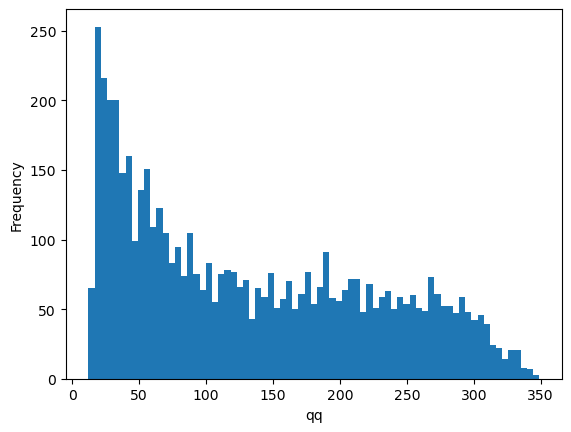

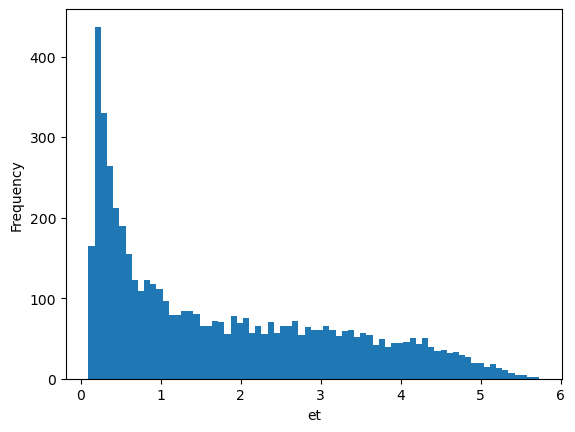

In [16]:
# plot histograms for each variable
for col in df.columns[1:10]:
    df[col].plot.hist(bins=int(np.sqrt(df.shape[0])))
    plt.xlabel(col)
    plt.show()

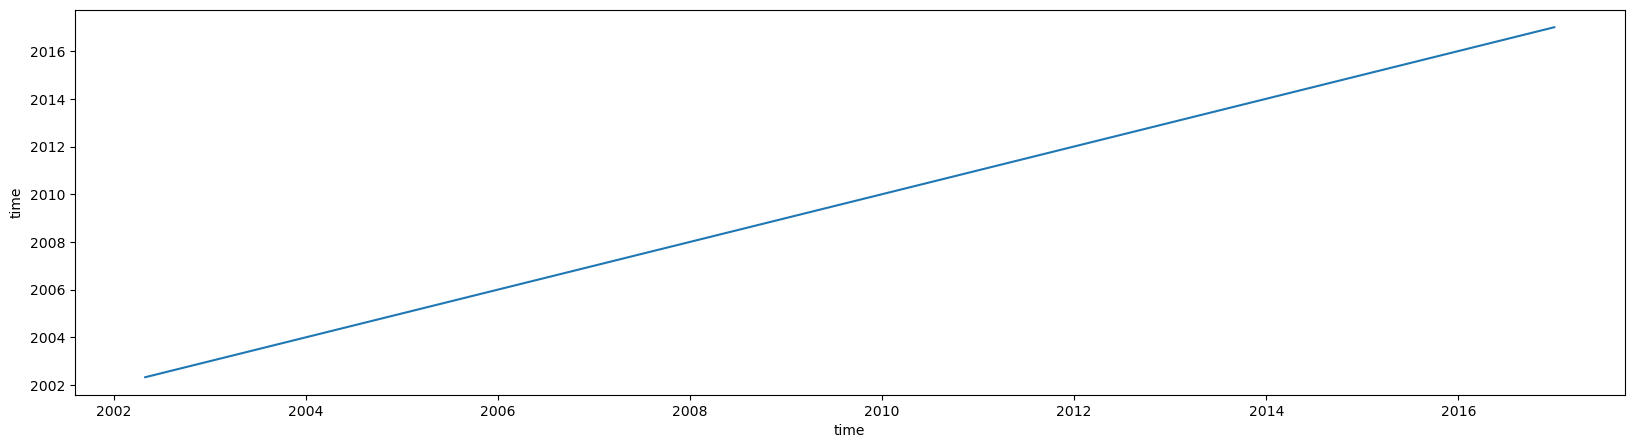

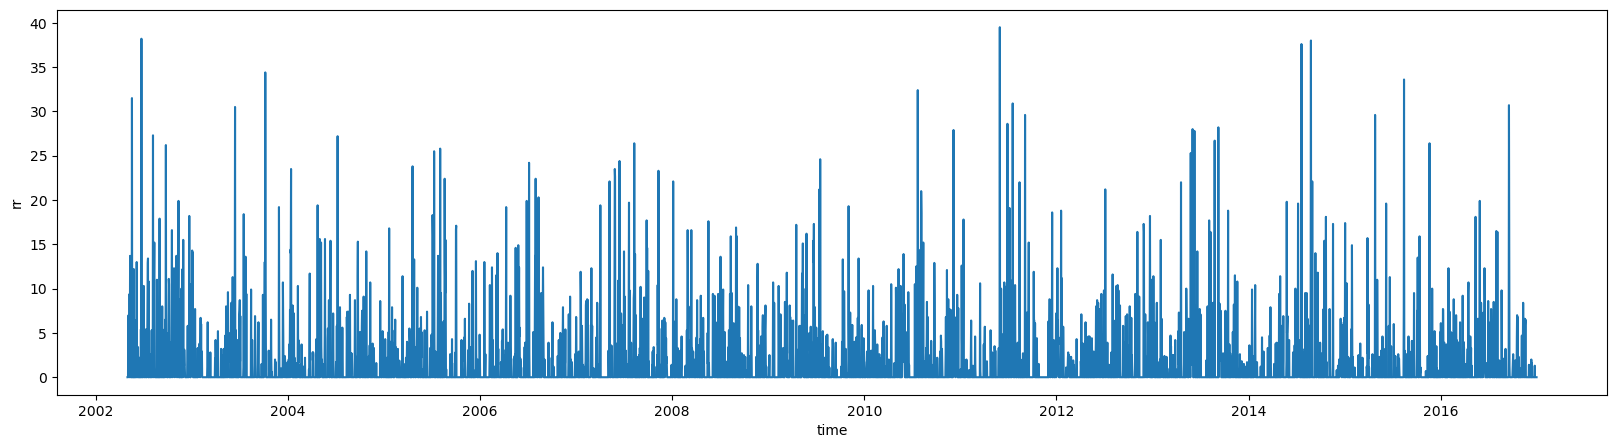

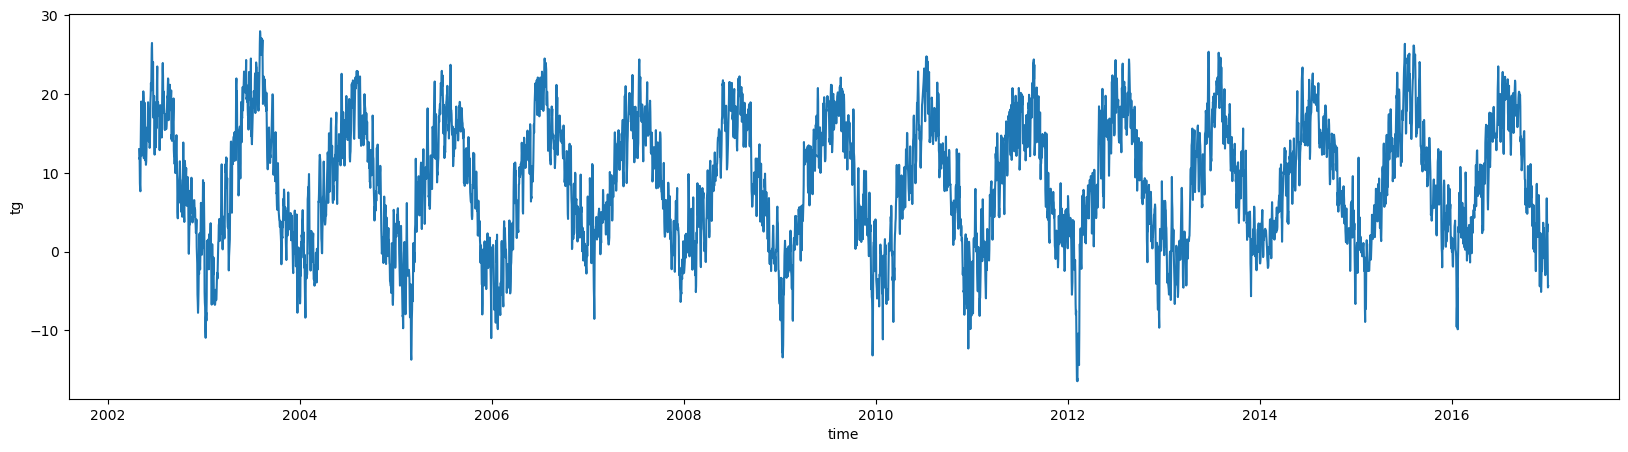

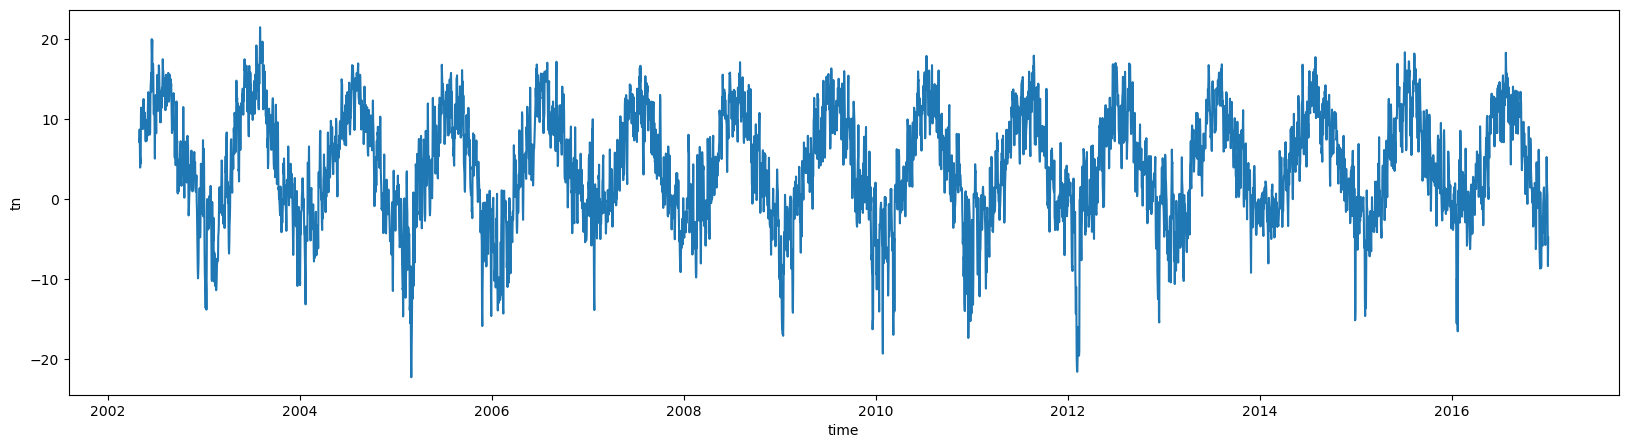

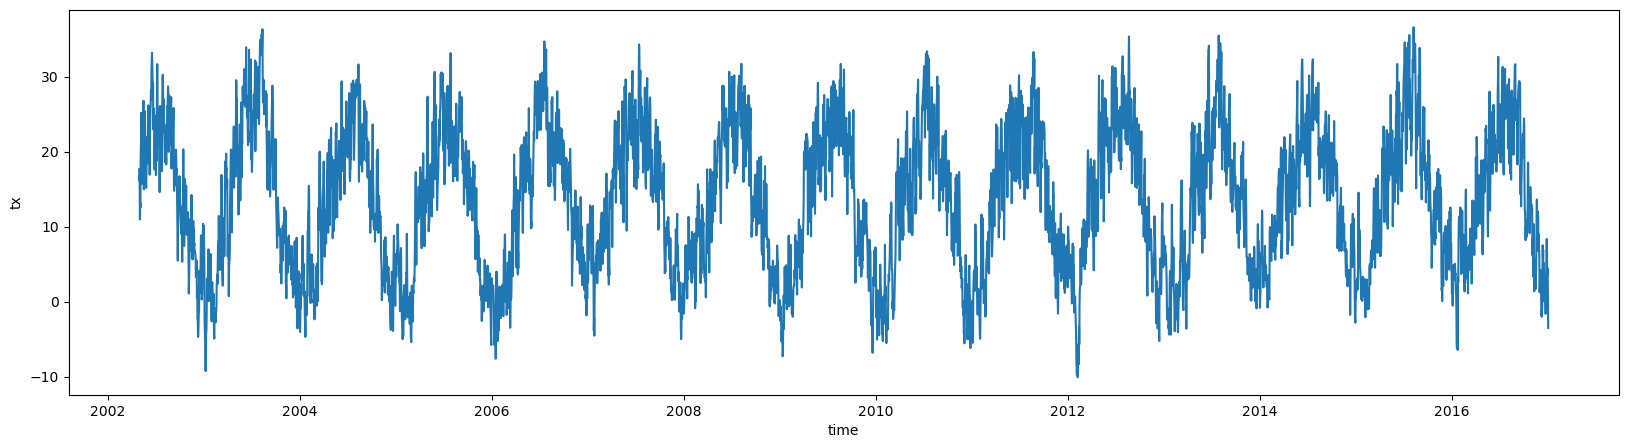

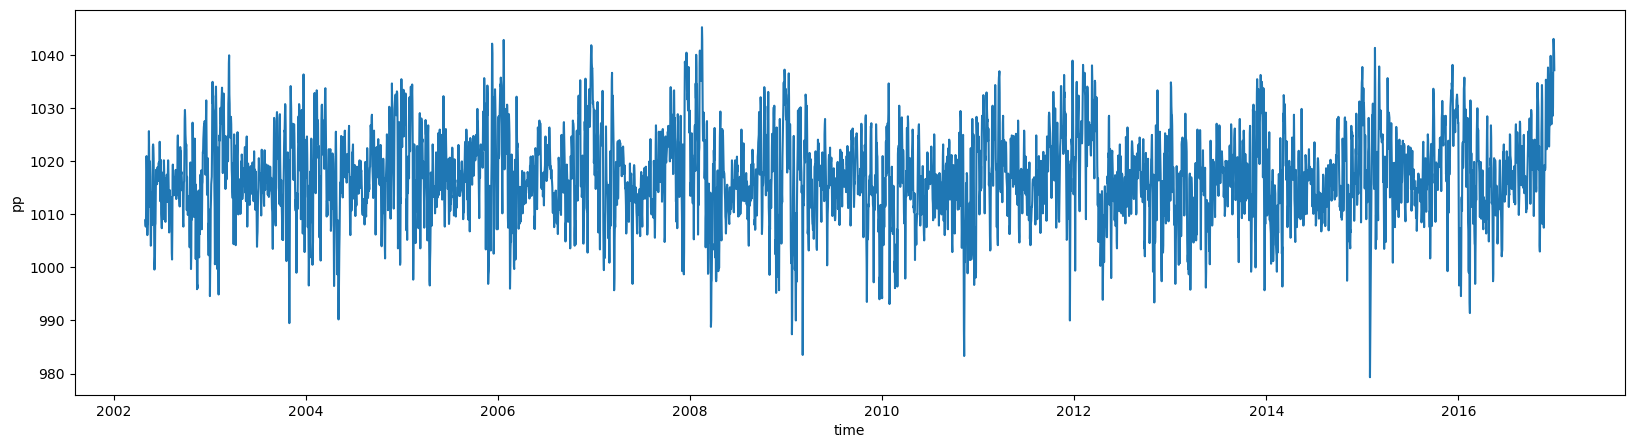

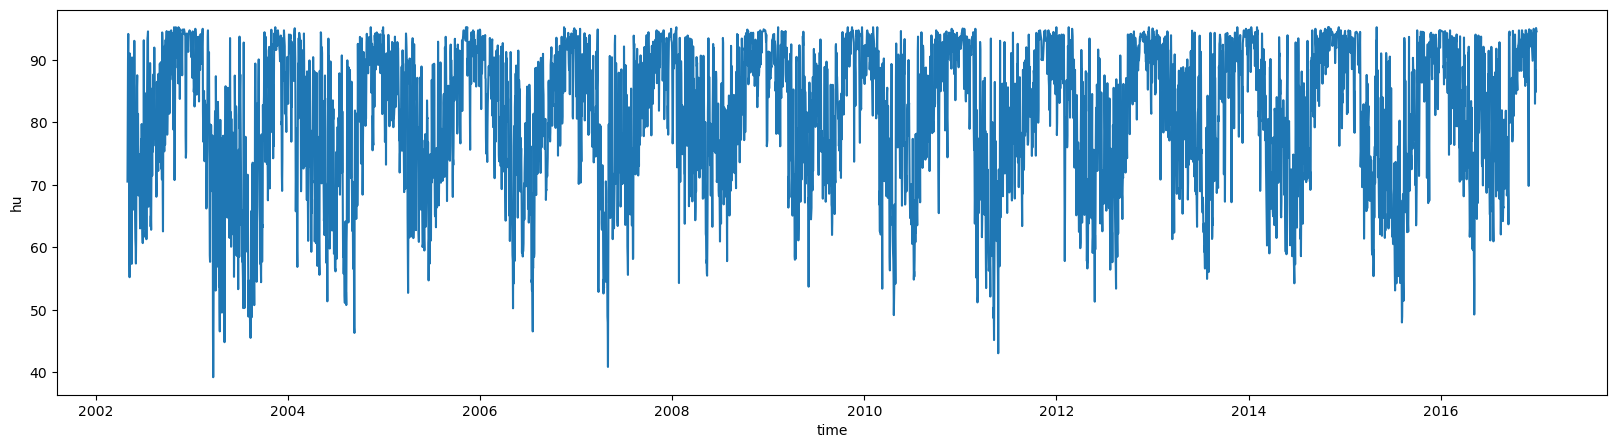

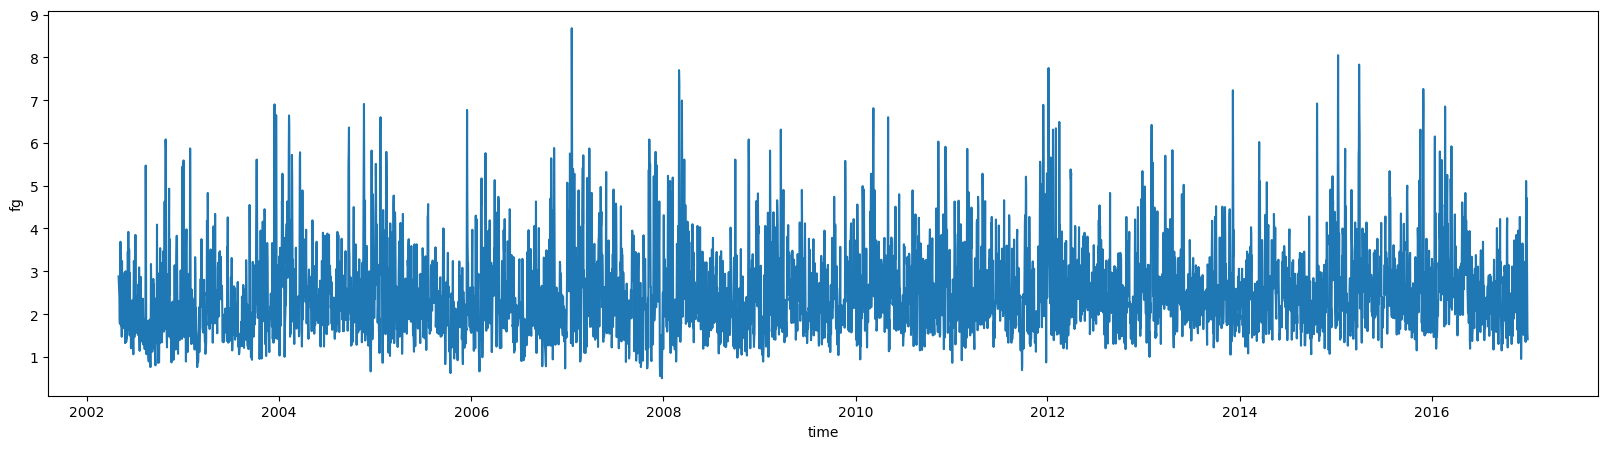

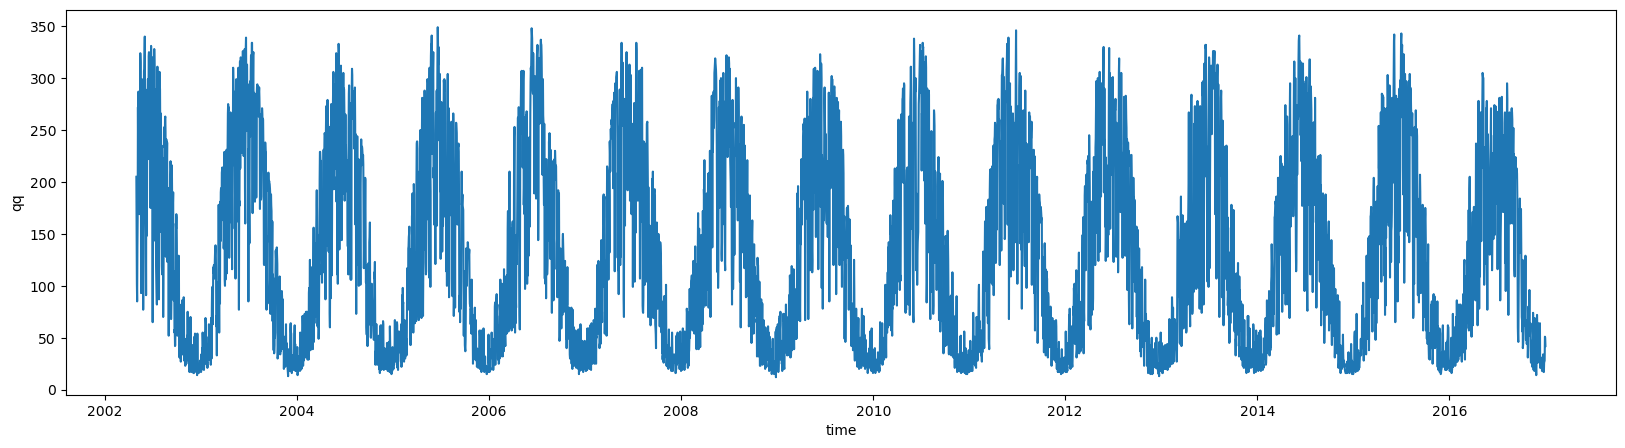

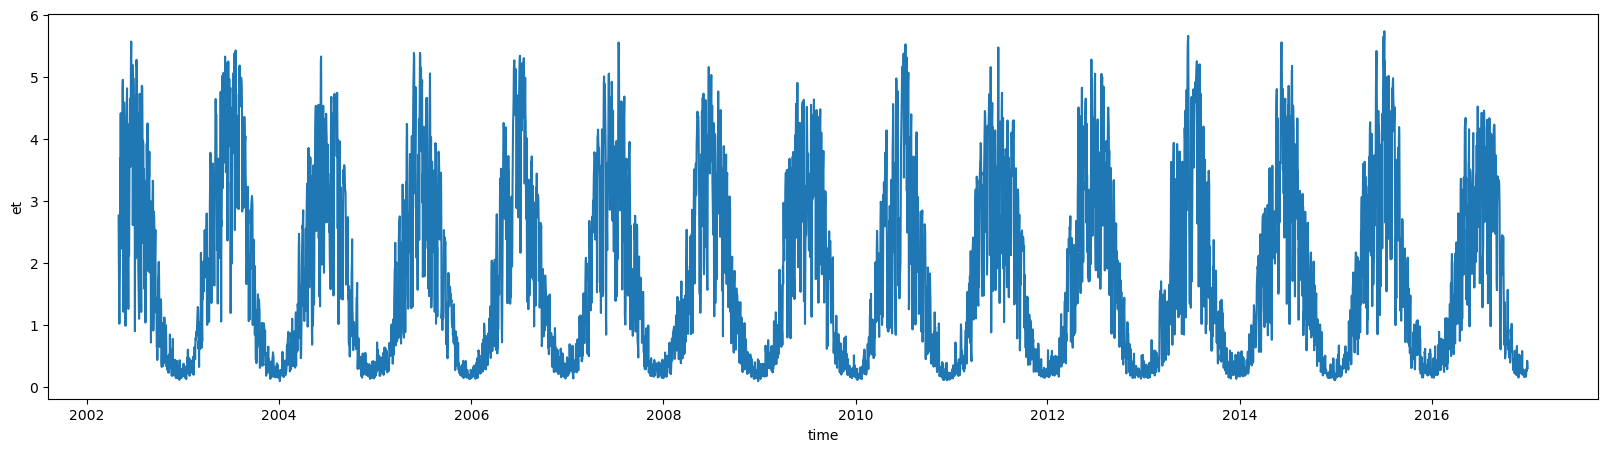

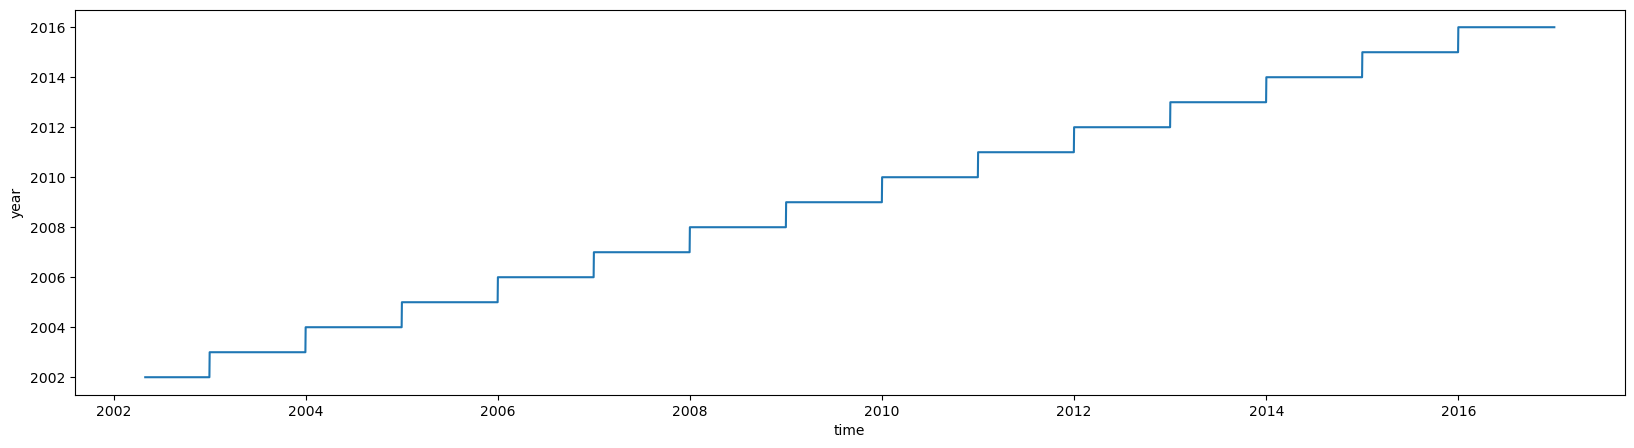

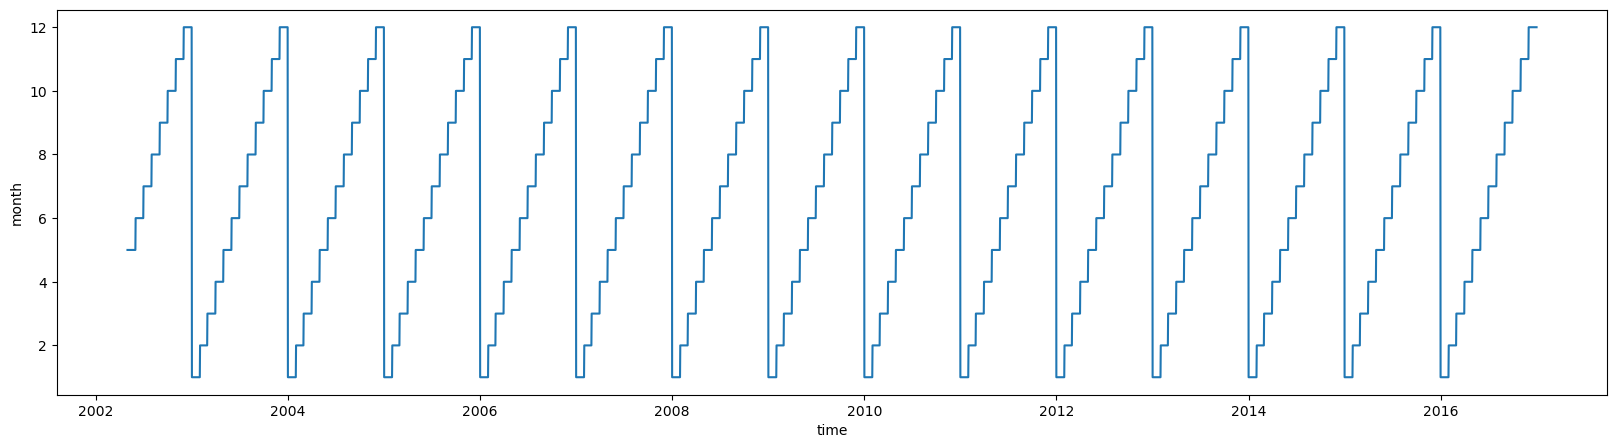

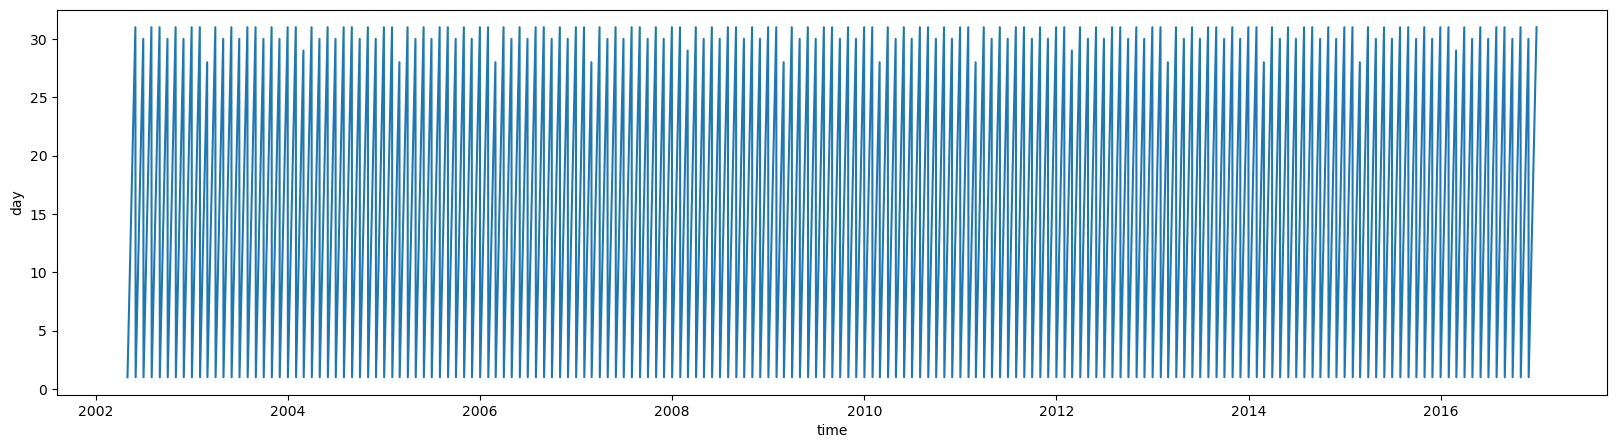

In [41]:
# plot trend lines for each feature variable:
for ft in df.columns:
    plt.figure(figsize=(20,5))
    plt.plot(df['time'],df[ft])
    plt.xlabel('time')
    plt.ylabel(ft)
    plt.show()

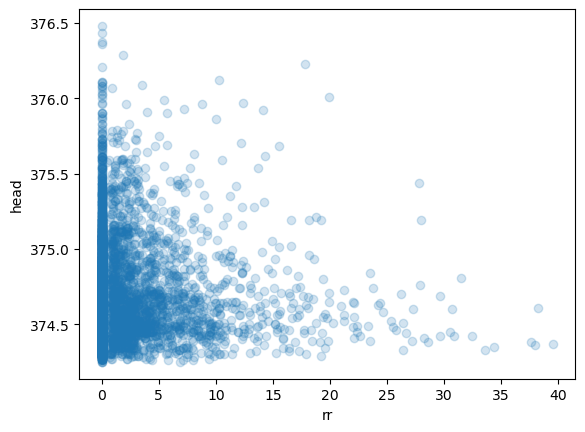

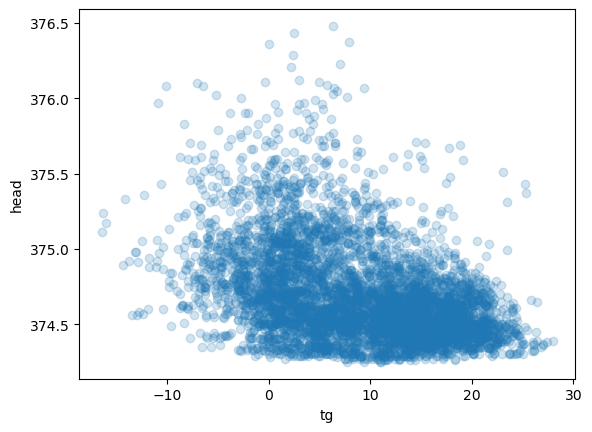

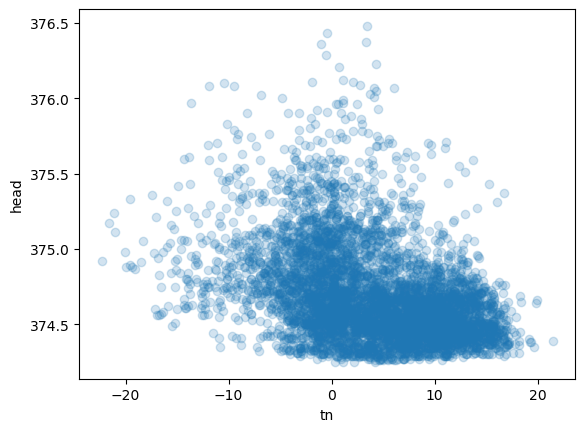

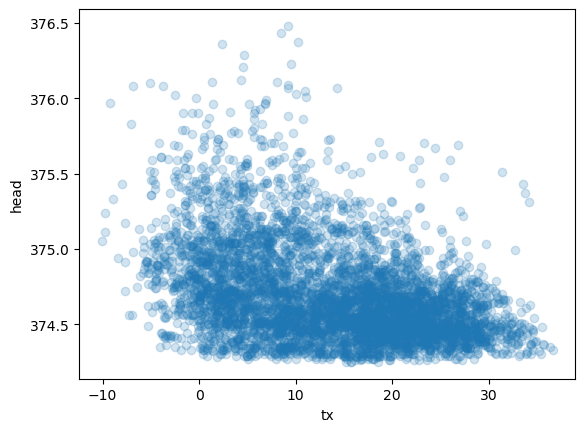

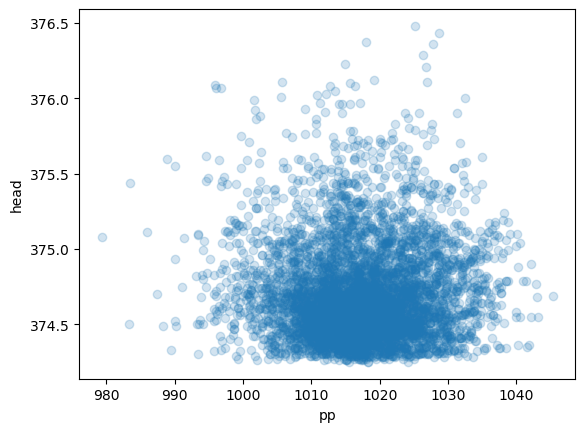

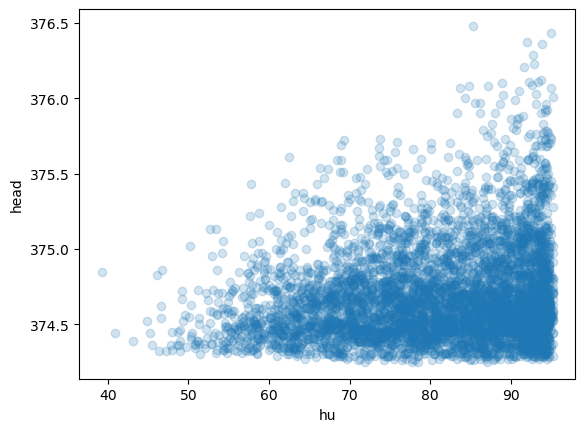

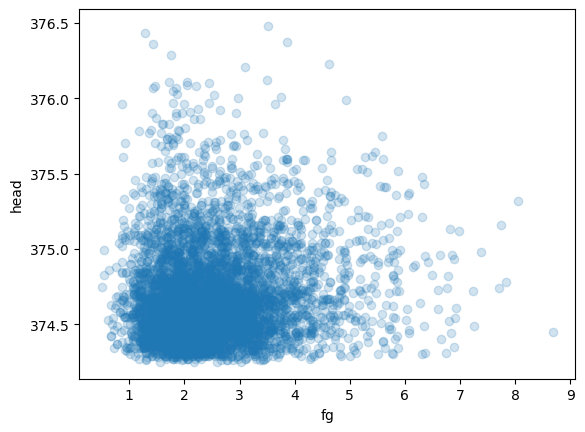

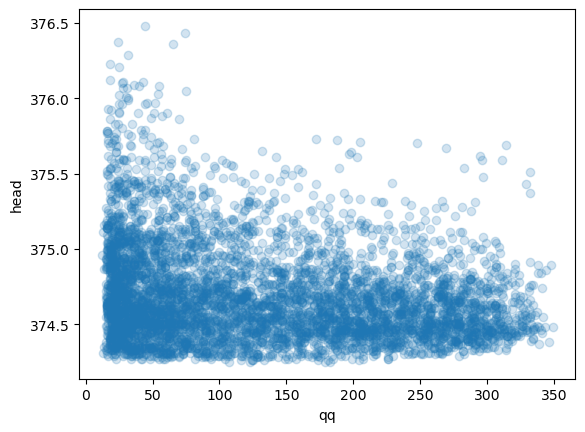

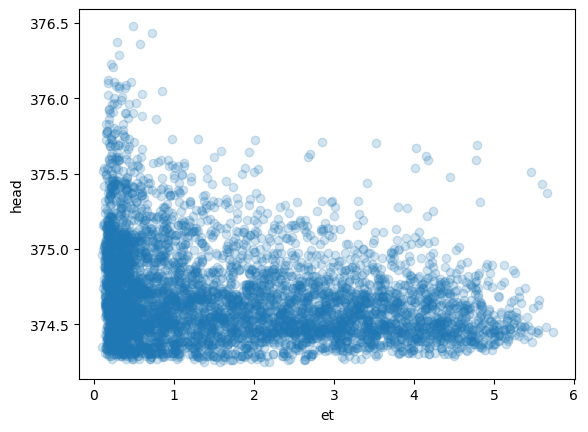

In [17]:
# scatter plot of each feature variable with target variable
for col in df.columns[1:10]:
    plt.scatter(df[col], target['head'], alpha = 0.2)
    plt.xlabel(col)
    plt.ylabel('head')
    plt.show()

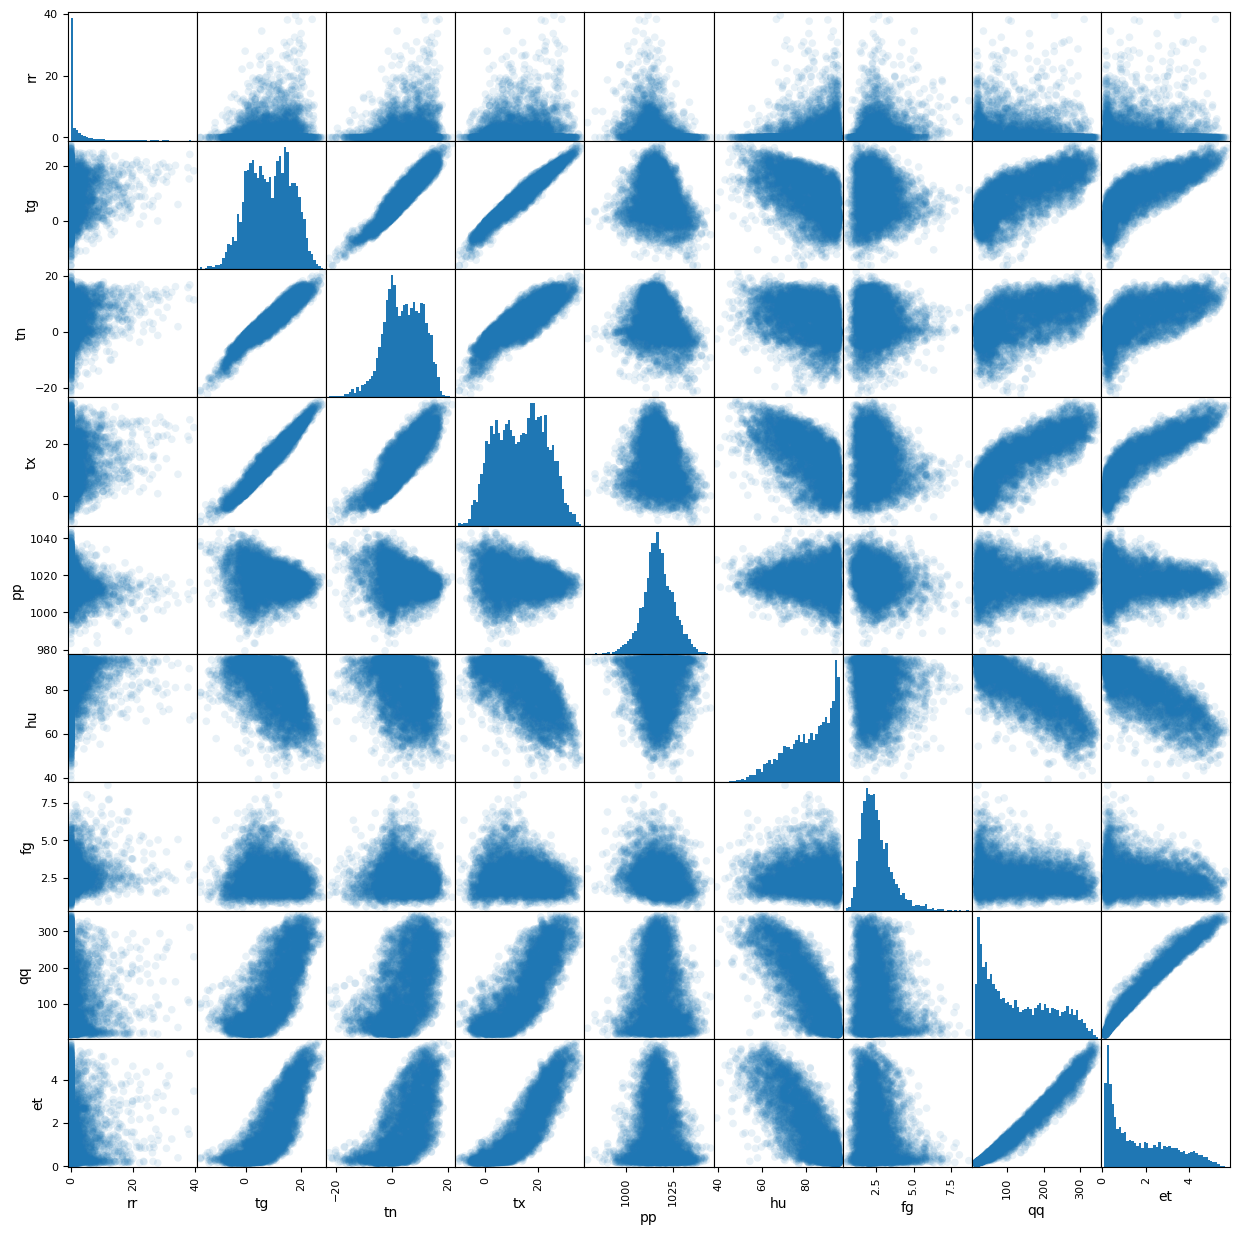

In [18]:
# scatter plot between feature variables
pd.plotting.scatter_matrix(df.select_dtypes(float), figsize=(15, 15), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()

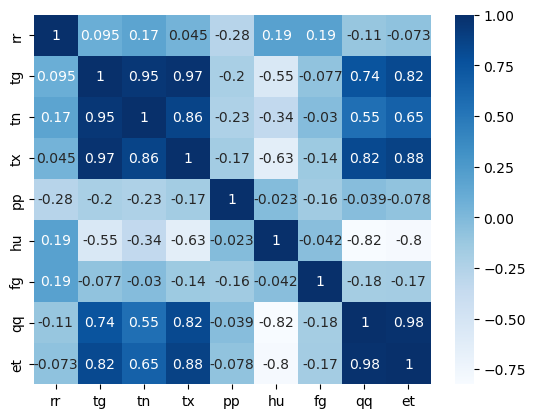

In [19]:
corr_matrix = df.select_dtypes(float).corr()
corr_map = sns.heatmap(corr_matrix, cmap='Blues', annot=True)

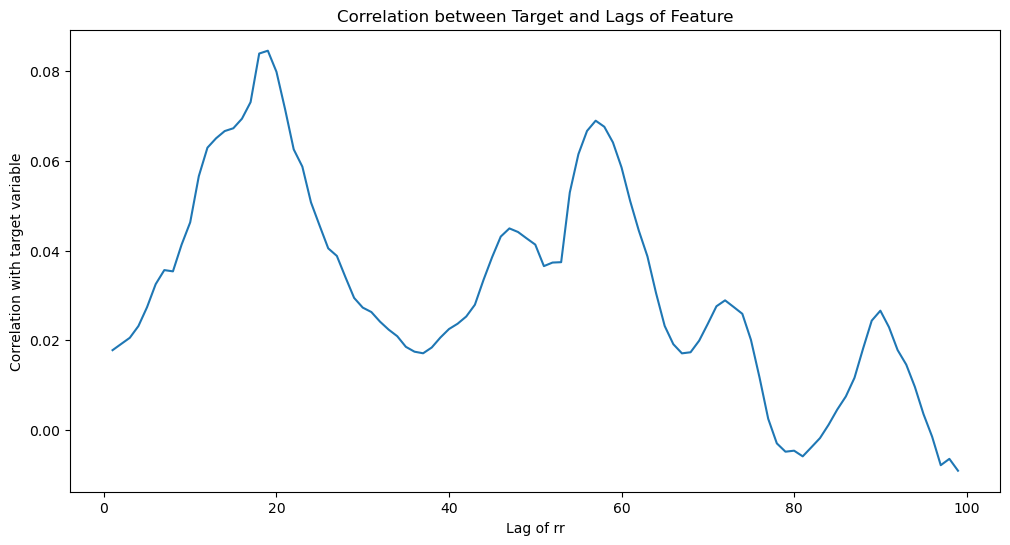

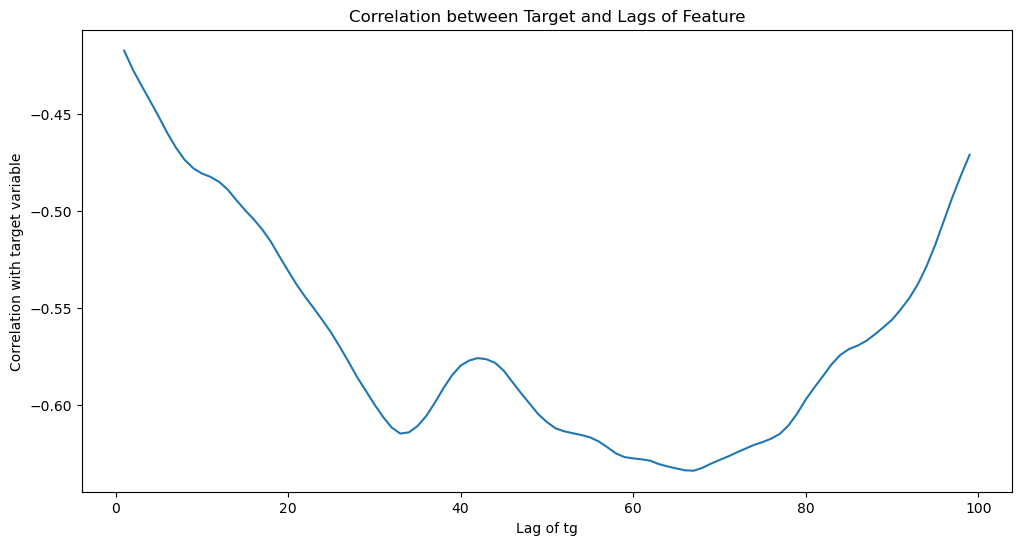

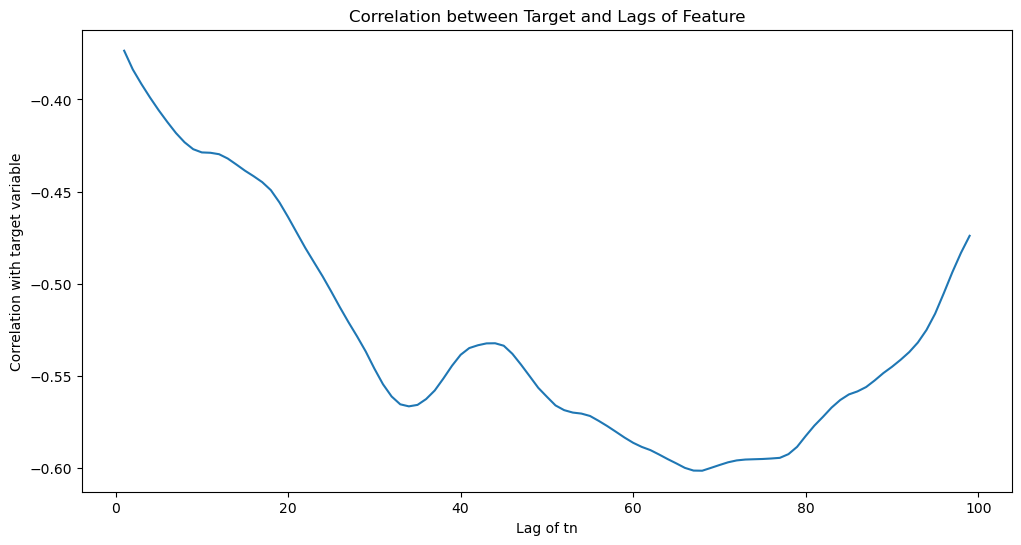

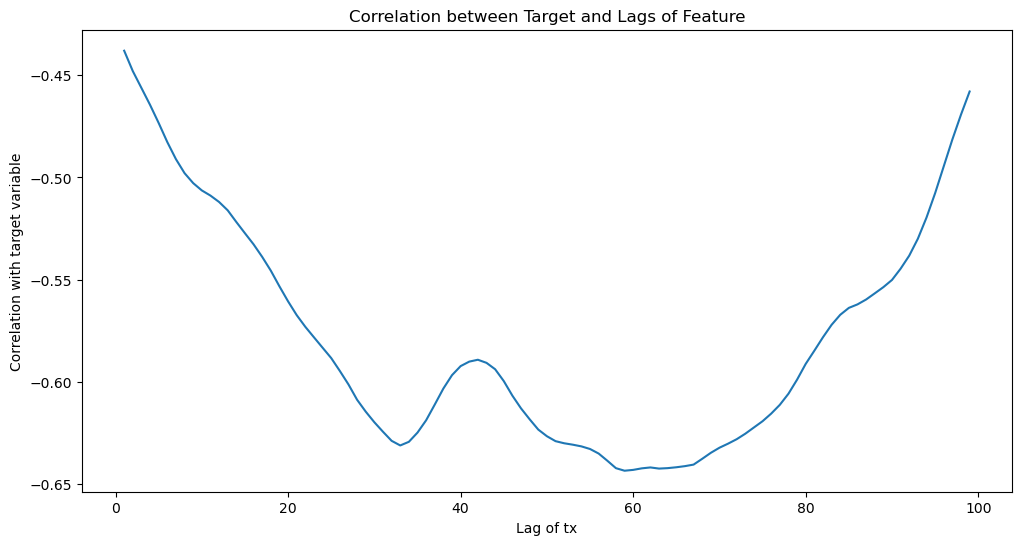

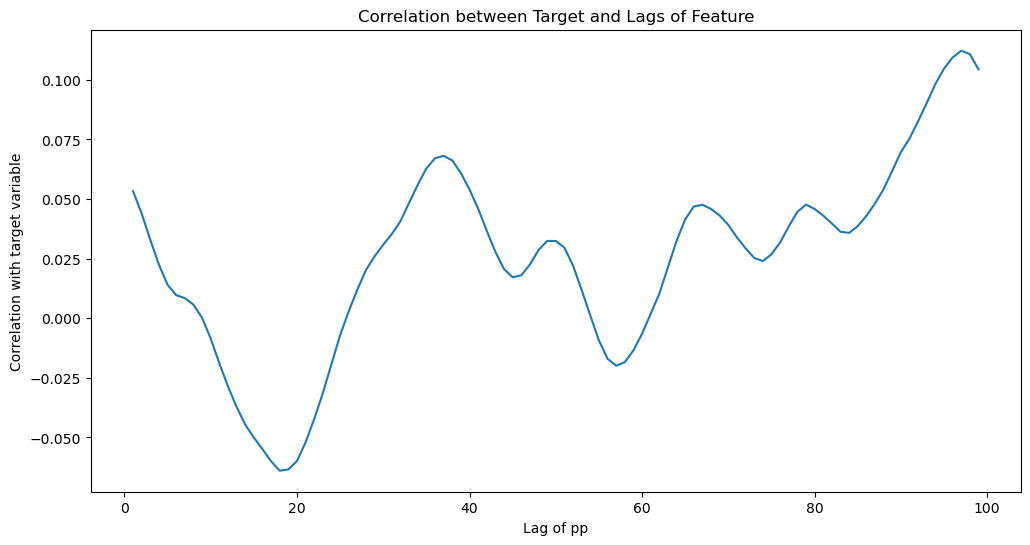

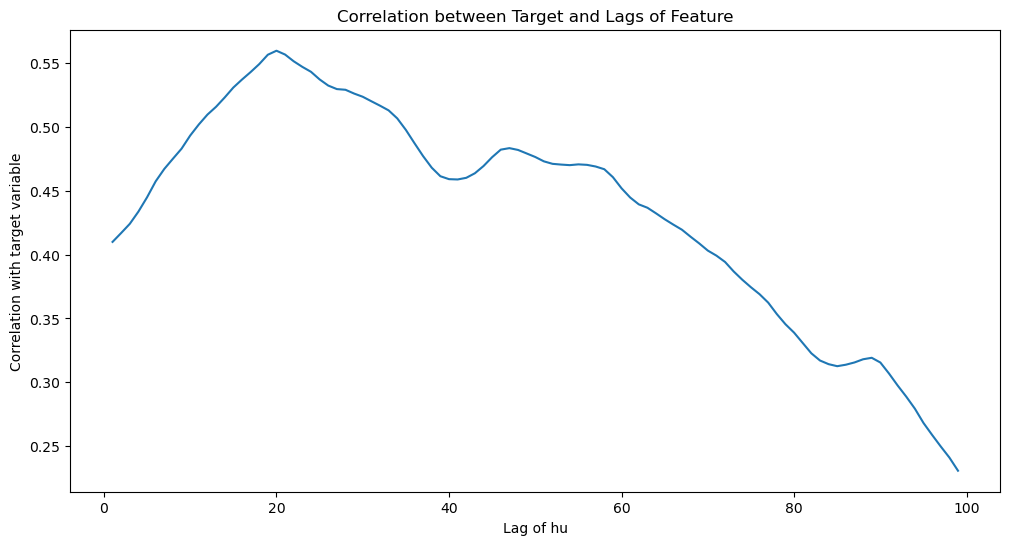

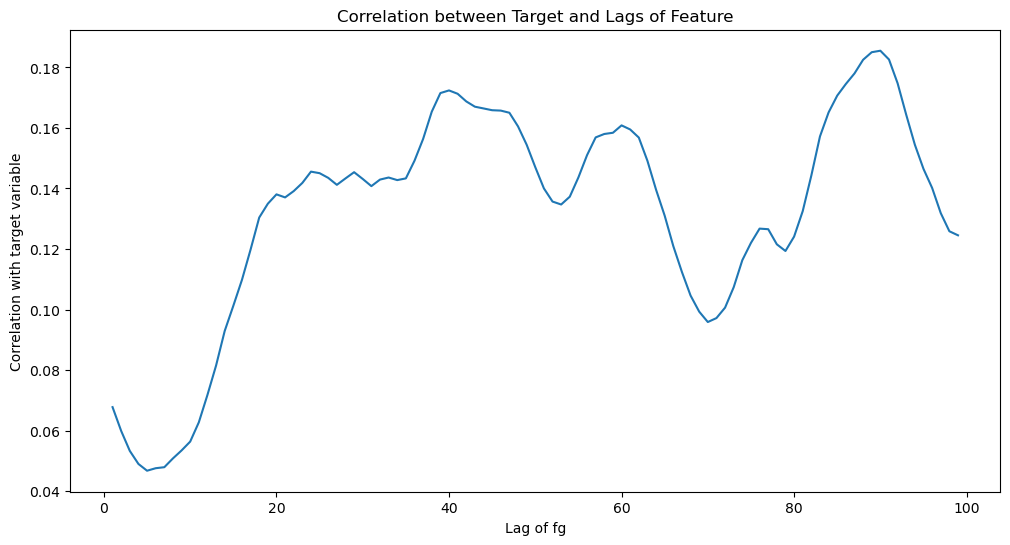

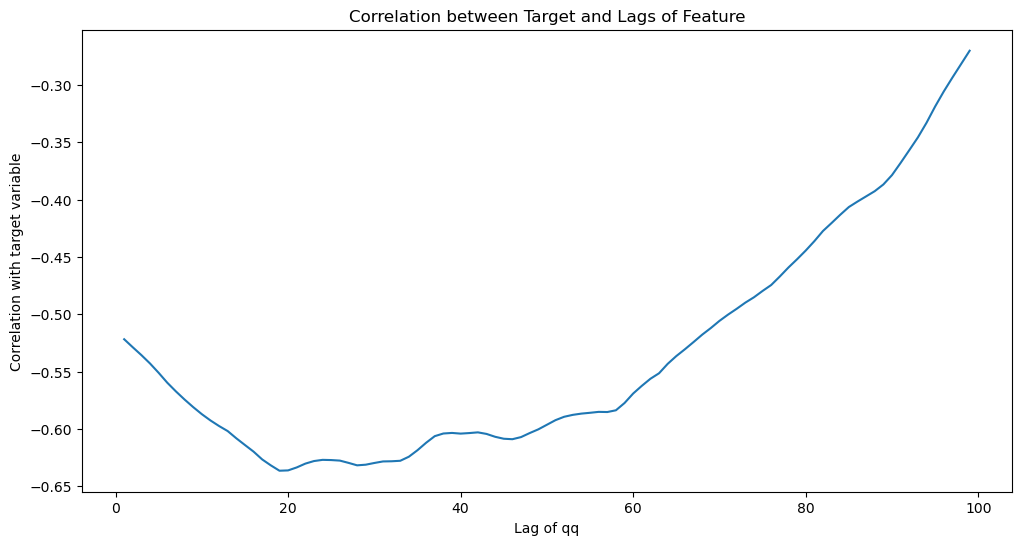

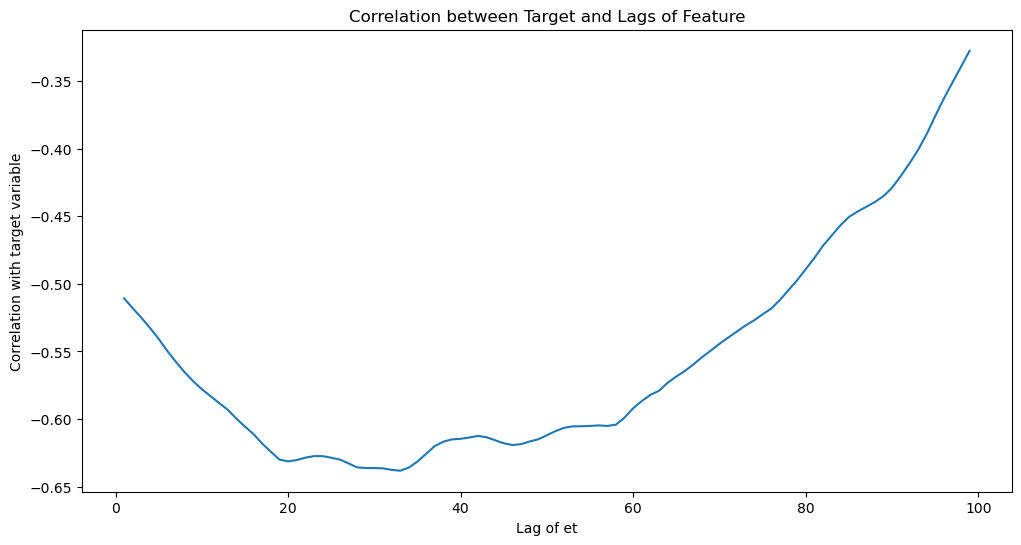

In [47]:
# correlation between target variable and lags of feature variables:
lags = range(1, 100)
features = ['rr','tg','tn','tx','pp','hu','fg','qq','et']

for ft in features:
    # Calculate the correlation between target and lags of the feature variable
    correlations = [target['head'].corr(df[ft].shift(-lag)) for lag in lags]

    # Plot the correlations
    plt.figure(figsize=(12, 6))
    plt.plot(lags, correlations)
    plt.title('Correlation between Target and Lags of Feature')
    plt.xlabel(f'Lag of {ft}')
    plt.ylabel('Correlation with target variable')
    plt.show()